<a href="https://colab.research.google.com/github/learneverythingai/Shivam-Modi-Data-Science-Analytics-Course/blob/main/Deep%20Learning%20Course/New_CNN_Part1_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Author and Instructor of this Notebook is **Shivam Modi**.

## LinkedIn: https://www.linkedin.com/in/shivam-modi-datascientist/

# **Convolutional Neural Network - Deep Learning**

# What is a Convolutional Neural Network (CNN)?
(Reference : [link text](https://www.youtube.com/watch?v=QzY57FaENXg))
<p>CNN is a specialised kind of neural network for processing data that has a known, grid-like topology. The most common example of grid-structured data is a 2D image. An important characteristic of CNN is its operation, which is referred to as convolution. Convolution is a special kind of linear operation.
<p>In general CNN consists of one or more convolutional layers and then followed by one or more fully connected layers as in a standard multilayer neural network. The architecture of CNN is designed in such a way that it takes advantage of the 2D structure of an input image. Another benefit of CNN is that they are easier to train and have many fewer parameters than a fully connected network with the same number of hidden layers.

# Concept of Convolution Operator 
(Reference : [link text](https://www.youtube.com/watch?v=Etksi-F5ug8))
<p>Convolution is a type of linear operator. It operates on two functions of real-valued arguments. 
<p> Let consider an example for better understanding, suppose we are using a laser sensor to track the location of a spaceship. where the laser sensor provides a single output $x(t)$ w.r.t. position at time $t$. Since both these variables are real-valued, we can get different output as the time changes. In order to get a less noisy estimate of the spaceship, we take the average of several measurements (or output). Assigning the weighted average to the recent measurements since it is more relevant. Using the weighting function $w(a)$, a is the time of a measurement.
<p> Applying this function everytime will get a new function $b$ resulting in the most accurate estimation of the position of the spaceship $$b(t) = \int_{} x(a)w(t-a)da$$
This operator is called convolution. The operator is generally denoted with an asterisk: $$s(w) = (x * w)(t)$$
In the above example , $w$ needs to be 0 for all negative arguments. In CNN terminology, the first argument to the convolution is often referred to as the $input$ and the second argument as the $kernel$. And the output is the $feature map$.
<p>An example of convolution without kernel-flip is shown above. In the above fig. the output is restricted to only one position where the kernel lies entirely within the image, called $valid$ convolution. The boxes were drawn with arrows to indicate how the upper-left element of the output tensor is formed by applying the kernel to the upper-left region of the input tensor respectively.

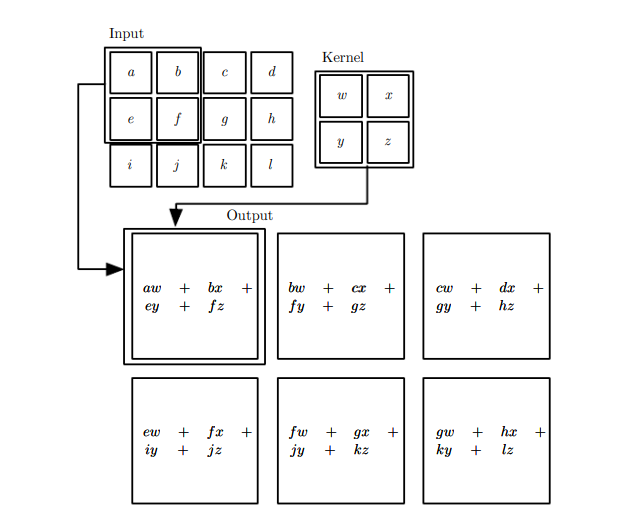

1.   Sparse Weight : In general every output unit interacts with every input unit. Convolutional networks typically have sparse weight i.e., making the kernel smaller than the input. 
<p> For example, while processing an image, it consists of thousands to millions of pixels in the output image, but we can detect small features such as edges with kernels that occupy only tens or hundreds of pixels. This Results in fewer parameters, which reduces both the memory requirement and improves the statistical efficiency.  
2.   Equivariant representation : It means that if the input changes, the output changes in the same way. In the image, convolution creates a 2D map of where certain features appear in the input. If we move the object in the input, its representation will move the same amount in the output.
 
3. Parameter sharing : It refers to the same parameter for more than one function in a model.That is, each member of the kernel is used at every position of the input. The parameter sharing used by the convolution operation means that rather than learning a separate set of parameters for every location, it learns only one set. Although it does not affect the runtime of forward propagation, it further reduces the storage requirement of the model to $k$ parameters.

# Pooling
(Reference : [link text](https://www.youtube.com/watch?v=zg_AA3fZpE0))
<p>A pooling function replaces the output of the net at a certain location with a summary statistic of the nearby outputs. In other words, pooling is a down-sampling operation which reduces the dimensionality of the feature map in order to introduce the translational invariance to small shifts and it reduces the number of learnable parameters.
 
 
Max Pooling : Max pooling extracts patches from the input feature maps, and provides the maximum output value in each patch, and discards all the other values. A max pooling with a filter of size 2 × 2 with a stride of 2 is commonly used in practice. This downsamples the in-plane dimension of feature maps by a factor of 2.Here the depth dimension of feature maps remains unchanged.
<p> Consider an example of max pooling operation with a filter size of 2 × 2, no padding, and a stride of 2, which extracts 2 × 2 patches from the input tensors, outputs the maximum value in each patch, and discards all the other values, resulting in downsampling the in-plane dimension of an input tensor by a factor of 2.

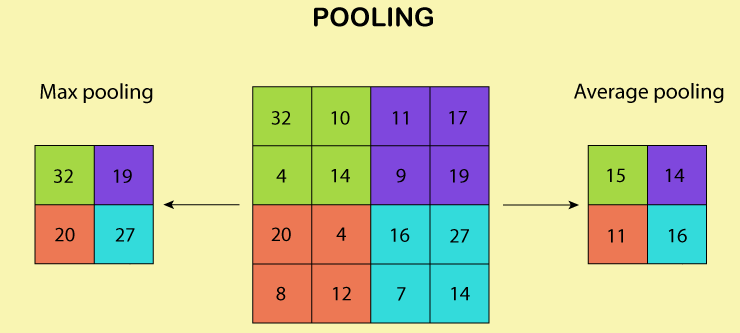






# Image Classification using CNN
(Reference : [link text](https://www.youtube.com/watch?v=7HPwo4wnJeA))
<p>To implement a CNN model we will be using the CIFAR-10 dataset. It has 60,000 colour images in 10 different classes. The image size is 32x32 and the dataset has 50,000 training images and 10,000 test images.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sm

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Conv2D, Dropout, MaxPooling2D, Flatten

In [ ]:
from keras.datasets import cifar10
(x_train,y_train), (x_test,ytest) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train,y_train

(array([[[[ 59,  62,  63],
          [ 43,  46,  45],
          [ 50,  48,  43],
          ...,
          [158, 132, 108],
          [152, 125, 102],
          [148, 124, 103]],
 
         [[ 16,  20,  20],
          [  0,   0,   0],
          [ 18,   8,   0],
          ...,
          [123,  88,  55],
          [119,  83,  50],
          [122,  87,  57]],
 
         [[ 25,  24,  21],
          [ 16,   7,   0],
          [ 49,  27,   8],
          ...,
          [118,  84,  50],
          [120,  84,  50],
          [109,  73,  42]],
 
         ...,
 
         [[208, 170,  96],
          [201, 153,  34],
          [198, 161,  26],
          ...,
          [160, 133,  70],
          [ 56,  31,   7],
          [ 53,  34,  20]],
 
         [[180, 139,  96],
          [173, 123,  42],
          [186, 144,  30],
          ...,
          [184, 148,  94],
          [ 97,  62,  34],
          [ 83,  53,  34]],
 
         [[177, 144, 116],
          [168, 129,  94],
          [179, 142,  87],
   

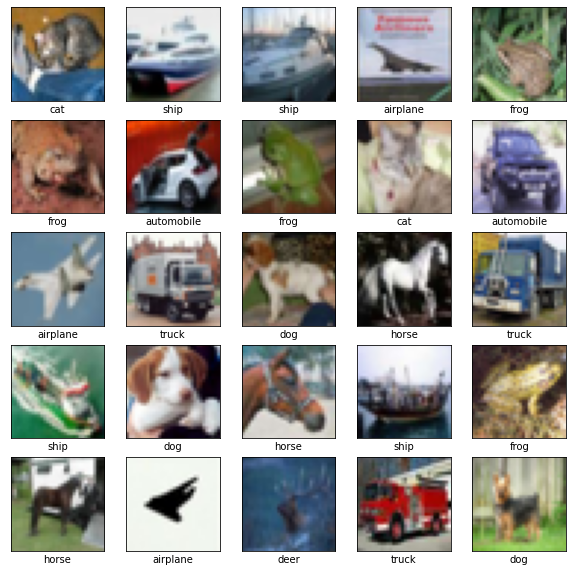

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    classNames = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i])
    plt.xlabel(classNames[ytest[i][0]])
plt.show()

In [ ]:
# Converting input image data into float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
x_train = (x_train-x_train.mean())/x_train.max()
x_test = (x_test-x_test.mean())/x_test.max()
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(ytest,10)

In [ ]:
# Difference between ytest and y_test
print(ytest)
print(y_test)

[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [ ]:
List = [x_train.shape,x_test.shape,y_train.shape,y_test.shape]
print(List)

[(50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 10), (10000, 10)]


In [ ]:
model = Sequential()
    
model.add(Conv2D(32, (3, 3), padding='same',activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same',activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
    
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
    
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1.0e-4), metrics = ['accuracy']) 

In [ ]:
model.fit(x_train, y_train, batch_size=256, epochs=200)

Epoch 1/200
196/196 [==============================] - 1s 7ms/step - loss: 1.9800 - accuracy: 0.2885
Epoch 2/200
196/196 [==============================] - 1s 7ms/step - loss: 1.6653 - accuracy: 0.4065
Epoch 3/200
196/196 [==============================] - 1s 7ms/step - loss: 1.5309 - accuracy: 0.4519
Epoch 4/200
196/196 [==============================] - 1s 7ms/step - loss: 1.4519 - accuracy: 0.4814
Epoch 5/200
196/196 [==============================] - 1s 7ms/step - loss: 1.3942 - accuracy: 0.5013
Epoch 6/200
196/196 [==============================] - 1s 7ms/step - loss: 1.3508 - accuracy: 0.5172
Epoch 7/200
196/196 [==============================] - 1s 7ms/step - loss: 1.3082 - accuracy: 0.5336
Epoch 8/200
196/196 [==============================] - 1s 7ms/step - loss: 1.2788 - accuracy: 0.5455
Epoch 9/200
196/196 [==============================] - 1s 7ms/step - loss: 1.2482 - accuracy: 0.5577
Epoch 10/200
196/196 [==============================] - 1s 7ms/step - loss: 1.2171 - accura

In [ ]:
yhat = model.predict_classes(x_test)
print(sm.classification_report(ytest,yhat))
print(f'Accuracy of test data: {sm.accuracy_score(ytest,yhat)*100}%')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1000
           1       0.83      0.89      0.86      1000
           2       0.66      0.69      0.67      1000
           3       0.60      0.60      0.60      1000
           4       0.71      0.75      0.73      1000
           5       0.69      0.62      0.65      1000
           6       0.84      0.84      0.84      1000
           7       0.84      0.80      0.82      1000
           8       0.86      0.85      0.85      1000
           9       0.84      0.81      0.82      1000

    accuracy                           0.77     10000
   macro avg    

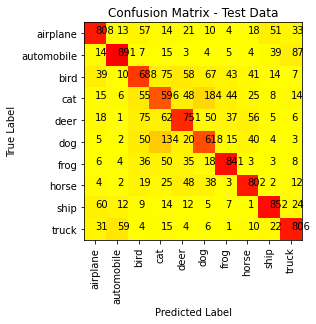

In [ ]:
cm = sm.confusion_matrix(ytest,yhat)
plt.clf()
plt.imshow(cm,cmap=plt.cm.autumn_r)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks,classNames,rotation=90)
plt.yticks(tick_marks,classNames)
for i in range(len(classNames)):
  for j in range(len(classNames)):
    plt.text(i,j,cm[i][j])
plt.show()